# NumPy


## Overview
Numpy (Numerical Python) is the fundamental package for scientific/numerical computing in Python. 
  
  - Provides a multidimensional array object, various derived objects (such as masked arrays and matrices),
  - Fast operations on arrays (mathematical, logical, shape manipulation, sorting, selecting...)
  - Tools for read/write arrays
  - Linear algebra, random number generation, Fourier transformation
  - C API for connecting `NumPy` with C, C++, Fortran libs
  - Data manipulation capabilities of `pandas` are built on top of the numpy library; `NumPy` is a dependency of the `pandas` lib
  
  - Vectorization: describes the absence of any explicit looping, indexing, etc., in the code.
  - Broadcasting: implicit element-by-element behavior of operations

In [1]:
# importing the numpy library
import numpy as np

#check your version of the numpy lib
np.__version__

'1.18.1'

## `ndarray`

NumPy’s main object is the **homogeneous** multidimensional array, `ndarray`. It is a table of elements (usually numbers), all of the **same type**, indexed by a tuple of positive integers. In NumPy dimensions are called axes. The number of axes is rank.


## Basic Array Manupulations

1. Attributes of arrays: determining size, shape, memory consumption, and data types of arrays

2. Indexing and slicing of arrays: getting and setting the value of individual array elements, getting and setting smaller subarrays within a larger array

3. Reshaping of arrays: changing the shape of an array

4. Joining and spliting arrays: combining multiple arrays into one, and splitting one array into many

### 1. How to create an `ndarray` and determining its attributes?

In [2]:
# method 1: using np.random 
# generate some random data
data = np.random.rand(2,3)
data

array([[0.5038818 , 0.85091628, 0.5785164 ],
       [0.60812262, 0.43695272, 0.23365307]])

In [3]:
# just like any other object in python, numpy's object `ndarray` objects have attributes
# here are some of the attributes of the data array
print ('array shape:',data.shape)
print ('array size:',data.size)
print ('array dtype:',data.dtype)
print ('array dimensions:',data.ndim)

array shape: (2, 3)
array size: 6
array dtype: float64
array dimensions: 2


In [4]:
# using help to find out the python documentation
np.random.rand?

** to generate random integer numbers:
```Python
numpy.random.randint(low, high=None, size=None, dtype='l')
```
Parameters:	

low : int

    Lowest (signed) integer to be drawn from the distribution (unless high=None, in which case this parameter is one above the highest such integer).
high : int, optional

    If provided, one above the largest (signed) integer to be drawn from the distribution (see above for behavior if high=None).
size : int or tuple of ints, optional

    Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.
dtype : dtype, optional

    Desired dtype of the result. All dtypes are determined by their name, i.e., ‘int64’, ‘int’, etc, so byteorder is not available and a specific precision may have different C types depending on the platform. The default value is ‘np.int’.

    New in version 1.11.0.

Returns:	

out : int or ndarray of ints

    size-shaped array of random integers from the appropriate distribution, or a single such random int if size not provided.


In [6]:
# using np.random.randint to create an array with integer values
data_int = np.random.randint(3, high=8, size=(2,3), dtype='l')
print (data_int)
print (type(data_int))

[[7 5 5]
 [3 7 7]]
<class 'numpy.ndarray'>


In [7]:
# each element in the array is of type ndarray
print (data_int[0])
print (type(data_int[0]))

[7 5 5]
<class 'numpy.ndarray'>


In [8]:
# each element inside the array is numpy.int64
print (data_int[0][2])
print (type(data_int[0][2]))

5
<class 'numpy.int32'>


In [9]:
# creating arrays
# method 2: using `array()`, convert from a list
data1 = [3,5,7,0.1,0] # or data1 = list(range(10))
arr1 = np.array(data1) # or arr1 = np.array([3,5,7,0.1,0]), takes a list!
arr1

array([3. , 5. , 7. , 0.1, 0. ])

In [10]:
# nested lists to np array
data2 = [[1,2,3,0,.3],[4,5,6,0,.4]]
arr2 = np.array(data2)
arr2

array([[1. , 2. , 3. , 0. , 0.3],
       [4. , 5. , 6. , 0. , 0.4]])

In [11]:
print ('type:',arr2.dtype) # np.array deduces the data type
print ('shape:',arr2.shape)
print ('ndim:',arr2.ndim) 

type: float64
shape: (2, 5)
ndim: 2


In [12]:
arr2 = np.array(data2,dtype=np.int8) #  dtype can also be specified
arr2
# test int64, float64

array([[1, 2, 3, 0, 0],
       [4, 5, 6, 0, 0]], dtype=int8)

In [13]:
# method 3: use arange, analogous to range function but returns an ndarray
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [15]:
type(np.arange(15))

numpy.ndarray

In [16]:
type(range(5))

range

#### Using zeros, ones, and empty functions to create arrays
The function zeros creates an array full of zeros, the function ones creates an array full of ones, and the function empty creates an array whose initial content is random and depends on the state of the memory. By default, the dtype of the created array is float64.

In [17]:
# 3: zeros, ones, and empty. pass a tuple for shape
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [18]:
np.ones((3,6))

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [19]:
# uninitialized, output may vary
np.empty((3,6,2))

array([[[5.56137502e+141, 7.01413727e-009],
        [2.04742282e+161, 3.33823170e+151],
        [6.42622019e-095, 6.01346953e-154],
        [5.98179233e-154, 4.23820020e+175],
        [9.94858344e-260, 1.41473196e+161],
        [1.05121188e-153, 2.44011708e-154]],

       [[6.01347002e-154, 2.48102713e-091],
        [2.44011708e-154, 6.01347002e-154],
        [6.98347053e-077, 2.44011733e-154],
        [6.09215471e+247, 9.92152728e+247],
        [5.03734573e+180, 8.17434450e+141],
        [6.01347002e-154, 8.59641098e+030]],

       [[1.72221190e+097, 1.16304910e+214],
        [6.01334510e-154, 6.01347002e-154],
        [8.03408340e-095, 1.05894612e-153],
        [5.49906507e-095, 8.56486050e+183],
        [4.26137353e+257, 5.98129747e-154],
        [2.04742402e+161, 6.96386740e+228]]])

Note on Printing: One-dimensional arrays are printed as rows, bidimensionals as matrices and tridimensionals as lists of matrices.

### 2A. Basic indexing and slicing
(in-place changes!)
- 1-D arrays are similar to lists; can be indexed, sliced, and iterated over.
- multi-D arrays can have one index per axis, use tuples!
- assignments to a specific location, a slice, or all replaces the respective values in the original array

In [20]:
arr1 = np.array([3,5,7,0.1,0])
arr1

array([3. , 5. , 7. , 0.1, 0. ])

In [21]:
arr1[0]=12
arr1

array([12. ,  5. ,  7. ,  0.1,  0. ])

In [22]:
arr1[2:4]=10
arr1

array([12.,  5., 10., 10.,  0.])

In [23]:
arr_slice=arr1[2:4]
arr_slice

array([10., 10.])

In [24]:
arr_slice[:]=1
arr_slice

array([1., 1.])

In [25]:
arr1

array([12.,  5.,  1.,  1.,  0.])

In [26]:
data2 = [[1,2,3,0,.3],[4,5,6,0,.4]]
arr2 = np.array(data2)

In [28]:
arr2

array([[1. , 2. , 3. , 0. , 0.3],
       [4. , 5. , 6. , 0. , 0.4]])

In [29]:
arr2[1]

array([4. , 5. , 6. , 0. , 0.4])

In [30]:
arr2[1,2] # or arr2[1][2]

6.0

In [33]:
def f(x,y):return 10*x+y
a = np.fromfunction(f,(5,5),dtype=int)
a

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [34]:
# get first 3 rows, only items 2 through 4
a[:3,2:4]

array([[ 2,  3],
       [12, 13],
       [22, 23]])

#### Simple assignments don't create a new object

In [35]:
a = np.arange(12)
print ('a:',a)
b = a
print ('b is a:', b is a)

a: [ 0  1  2  3  4  5  6  7  8  9 10 11]
b is a: True


In [37]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [38]:
a.shape

(12,)

In [39]:
b.shape = 3,4
# did shape of a change?
print ('after we changed the shape of b, what is the impact on a?\na is:',
       a,'\nshape of a:',a.shape)

after we changed the shape of b, what is the impact on a?
a is: [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 
shape of a: (3, 4)


#### View (or Shallow Copy)
`view`method creates a new array object that looks at the same data

In [40]:
c = a.view()
print ('c is a:',c is a)
print ('c.base is a:', c.base is a) 

c is a: False
c.base is a: True


#### - `c` is a view of the data owned by `a`, a new array object that has the same values as `a`

In [41]:
c.shape = 2,6 
print ('c is:',c,'\nshape of c:',c.shape)

c is: [[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]] 
shape of c: (2, 6)


In [42]:
# change shape of c. does it change the shape of a?
print ('a is:',a,'\nshape of a:',a.shape)

a is: [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] 
shape of a: (3, 4)


#### Deep copy: 
`copy()` method creates a new array object

In [43]:
d = a.copy()
print ('d is a:',d is a)
print ('d.base is a:', d.base is a) 
d[0,0] = 9999 
print ('d is:\n',d)
# change in d impacts a?
print ('a is:\n',a)

d is a: False
d.base is a: False
d is:
 [[9999    1    2    3]
 [   4    5    6    7]
 [   8    9   10   11]]
a is:
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


### 3. Specifying the shape of the array: `np.reshape()` and `np.newaxis()`
creates a no-copy view                   

In [44]:
x = np.array([1,2,3])
x

array([1, 2, 3])

In [45]:
x.reshape(3,1)

array([[1],
       [2],
       [3]])

In [46]:
x[np.newaxis,:] # creates a row vector

array([[1, 2, 3]])

In [47]:
x[:, np.newaxis] # creates a column vector

array([[1],
       [2],
       [3]])

#### 3d example:
d3array = np.arange(24).reshape(2,3,4)           # 3d array
```Python 
   #0  1  2  3 
[[[ 0  1  2  3]   #0 0
  [ 4  5  6  7]   #0 1
  [ 8  9 10 11]]  #0 2

 [[12 13 14 15]   #1 0
  [16 17 18 19]   #1 1
  [20 21 22 23]]] #1 2
```               
 2(= 0,1) 
 
 3(= 0,1,2)
 
 4(= 0,1,2,3)

In [48]:
# specifying the shape of the array:
d3array = np.arange(24).reshape(2,3,4)           # 3d array
print (d3array)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


### 4. Joining and splitting arrays
`np.concatanate()`,`np.vstack()`, `np.hstack()`,`np.dstack()`

In [49]:
x = np.array([1,2,3])
y = np.array([3,2,1])
np.concatenate([x,y])

array([1, 2, 3, 3, 2, 1])

In [50]:
# two dimentsional example
grid = [[1,2,3],
        [4,5,6]]

np.concatenate([grid,grid]) # default is on the first axis, row-wise

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [51]:
np.concatenate([grid,grid],axis=1) # concatenate on the second axis, column-wise

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [52]:
x = np.array([1,2,3])
grid = np.array([[9,8,7],
                [6,5,4]])

# vertically stack the arrays:
np.vstack([x,grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [53]:
# horizontally stack the arrays:
y = np.array([[99],
             [99]])
np.hstack([grid,y])

array([[ 9,  8,  7, 99],
       [ 6,  5,  4, 99]])

`np.split()`, `np.hsplit()`, `np.vsplit()`, `np.dsplit()`

In [54]:
x = [1,2,3,99,99,3,2,1]
np.split(x,[3,5]) # split x at index 3 and 5

[array([1, 2, 3]), array([99, 99]), array([3, 2, 1])]

In [55]:
grid = np.arange(16).reshape((4,4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [56]:
np.hsplit(grid,[2])

[array([[ 0,  1],
        [ 4,  5],
        [ 8,  9],
        [12, 13]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11],
        [14, 15]])]

In [57]:
np.vsplit(grid,[2])

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11],
        [12, 13, 14, 15]])]

## Computation on NumPy Arrays: Universal Functions

The key to making NumPy array operations fast is to use *vectorization*, performing an operation on the array, which will then be applied to each element. Vectorization is designed to push the loop into the compiled layer that underlies NumPy, leading to a faster executions. It is generally implemented through NumPy's universal functions. These functions can be used to make repeated calculations on array elements much more efficient!

Vectorization benefits:
- concise and easier to read
- fewer lines of code generally fewer bugs
- similar to standard mathematical notation 
- “Pythonic” code, less lines, higher efficiency

#### Testing speed!

In [58]:
np.random.seed(0)
def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i] 
    return output
values = np.random.randint(1,10,size=5)
print (values)
compute_reciprocals(values)

[6 1 4 4 8]


array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

In [59]:
big_array = np.random.randint(1,100,size = 1000000)
%timeit compute_reciprocals(big_array)
# this is going to take a while!

5.46 s ± 486 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [60]:
# try the vectorization approach to accomplish the same task
%timeit (1.0/big_array)

8.06 ms ± 179 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Array manipulation

In [61]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
print ('a:',a)
print ('b:',b)

a: [20 30 40 50]
b: [0 1 2 3]


In [62]:
c = a-b
print ('c:',c)

c: [20 29 38 47]


In [63]:
b**2

array([0, 1, 4, 9], dtype=int32)

In [64]:
10*np.sin(a)

array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

In [65]:
a<35

array([ True,  True, False, False])

See the pptx for the list of popular functions!

-----

### Broadcasting
Binary operations we reviewed were of the same size of arrays. Broadcasting allows these types of binary operations to be performed on arrays of different sizes, for example, we can add a scaler to an array!

In [66]:
a = np.array([1,2,3,4])
a+5

array([6, 7, 8, 9])

Broadcasting in this example makes us think that a `[5,5,5,5]` array was generated and then added to the array `a`. The advantage of broadcasting though is this `[5,5,5,5]` hasn't been created, you can use this mental model to think about broadcasting. 

In [67]:
# broadcasting example
np.ones((3,1))
# result is a 3row 1 column matrix

array([[1.],
       [1.],
       [1.]])

In [68]:
np.arange(3)
# result is a single row of 3 columns

array([0, 1, 2])

In [69]:
np.ones((3,1)) + np.arange(3)
# because we are able to use broadcasting, we can sum the two ndarrays without making them the same size!

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

*Image from astroML documentation. *

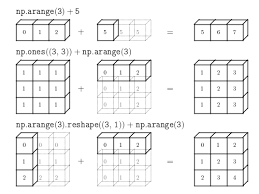

#### Rules of Broadcasting

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is padded with ones on its leading (left) side. 

- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is streched to match the other shape. 

- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised. 

### Indexing with Boolean Arrays

When we index arrays with arrays of (integer) indices we are providing the list of indices to pick. With boolean indices the approach is different; we explicitly choose which items in the array we want and which ones we don’t.

In [70]:
print ('a:',a)
b = a>2
print ('b:',b)

a: [1 2 3 4]
b: [False False  True  True]


In [71]:
a[b] #1d array with the selected elements

array([3, 4])

In [72]:
a[b] = 0 # All elements of 'a' higher than 2 become 0
a

array([1, 2, 0, 0])

In [73]:
#### Using a boolean array as a mask
to select a particular subsets of the data, we can use boolean arrays as masks.

SyntaxError: invalid syntax (<ipython-input-73-865ce334d327>, line 2)

In [74]:
data = [[5,0,3,3],
        [7,9,3,5],
        [2,4,7,6]]
x=np.array(data)

# select all elements less than 5
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

let's select these values from the array by using the Boolean array. This is called a *masking* operation.

In [75]:
x[x<5]
# select all elements that meet the criteria, returning True in the previous cell

array([0, 3, 3, 3, 2, 4])

### Fancy Indexing

Fancy indexing refers to indexing using integer arrays.
NumPy offers more indexing facilities than regular Python sequences. In addition to indexing by integers and slices, arrays can be indexed by arrays of integers and arrays of booleans. Fancy indexing allows us to very quickly access and modify complicated subsets of an array's values. 

e.g.
```python
arr = np.empty((10, 5))
for i in range(10): arr[i] = i
```
arr is an array with the following data:
```python
array([[0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5.],
       [6., 6., 6., 6., 6.],
       [7., 7., 7., 7., 7.],
       [8., 8., 8., 8., 8.],
       [9., 9., 9., 9., 9.]])     
```
To select out a subset of the rows in a particular order, you can simply pass a list or ndarray of integers specifying the desired order:

```python
arr[[8,2,0]]
```
arr slice looks like:
```python
array([[8., 8., 8., 8., 8.],
       [2., 2., 2., 2., 2.],
       [0., 0., 0., 0., 0.]])
```

In [76]:
arr = np.random.randint(low= 0, high = 100,size = (10,5))
arr

array([[82, 99, 28, 81, 57],
       [70, 71, 27, 77, 66],
       [73, 29, 75, 92, 93],
       [13, 40, 80, 64, 77],
       [19, 44, 99, 63, 29],
       [52, 11, 27, 54, 92],
       [85,  5, 43, 32, 51],
       [17, 88,  6, 41, 90],
       [25, 87, 75, 54, 45],
       [ 0, 41,  1, 47, 78]])

In [77]:
arr[[8,2,0],:2]

array([[25, 87],
       [73, 29],
       [82, 99]])

### Using Structured dtypes
We can also create structured data types by predefining the dtype of the numpy ndarray object:

In [78]:
# Structured dtype
dt = np.dtype([('course', np.unicode_, 16), ('points', np.float64, (2,))])
grades = np.array([('bio', (18.0, 67.0)), ('math', (87.0, 47.0))], dtype=dt)
print('dt.fields:',dt.fields) # dt.fields is a dictionary! 
print ('dt.names:',dt.names)  # dt.names is a tuple!

print ('dt:\n',dt)
print ('grades:\n',grades)
print ('value:',grades[0][1],', type:',type(grades[0][1]))

dt.fields: {'course': (dtype('<U16'), 0), 'points': (dtype(('<f8', (2,))), 64)}
dt.names: ('course', 'points')
dt:
 [('course', '<U16'), ('points', '<f8', (2,))]
grades:
 [('bio', [18., 67.]) ('math', [87., 47.])]
value: [18. 67.] , type: <class 'numpy.ndarray'>


### Using RecordArrays
NumPy also provides the `np.recarray` class, which is almost identical to th estuructured arrays, but with one additional feature: fields can be accessed as attributes rathar than as dictionary keys. 

In [79]:
# structured array
grades['course']

array(['bio', 'math'], dtype='<U16')

Observe the time it takes to use each version:

In [ ]:
%timeit grades['course'] # structured array

In [ ]:
grades_rec = grades.view(np.recarray) # convert it to a recordarray
%timeit grades_rec['course']

In [ ]:
%timeit grades_rec.course

`grades_rec['course']` is the fastest statement!

Structured arrays and RecordArrays are good to know about for certain situations, *especially when using NumPy arrays to map onto binary data formats in C, Fortrun (which is unlikely)*, for day-to-day use of structured data we will be using Pandas package!

** End of Module **